In [1]:
! pip3 install --upgrade azure-cognitiveservices-vision-computervision
! pip3 install opencv-python pillow matplotlib

In [2]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

In [3]:
from array import array
import os
from PIL import Image
import sys
import time

In [4]:
subscription_key = "d6916d3114504b98819abca3b38a90aa"
endpoint = "https://kinfeyocrhol.cognitiveservices.azure.com/"

In [5]:
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

In [6]:
'''
OCR: Read File using the Read API, extract text - remote
This example will extract text in an image, then print results, line by line.
This API call can also extract handwriting style text (not shown).
'''
print("===== Read File - remote =====")
# Get an image with text
read_image_url = "https://raw.githubusercontent.com/MicrosoftDocs/azure-docs/master/articles/cognitive-services/Computer-vision/Images/readsample.jpg"

# Call API with URL and raw response (allows you to get the operation location)
read_response = computervision_client.read(read_image_url,  raw=True)

===== Read File - remote =====


In [7]:
# Get the operation location (URL with an ID at the end) from the response
read_operation_location = read_response.headers["Operation-Location"]
# Grab the ID from the URL
operation_id = read_operation_location.split("/")[-1]

# Call the "GET" API and wait for it to retrieve the results 
while True:
    read_result = computervision_client.get_read_result(operation_id)
    if read_result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

# Print the detected text, line by line
if read_result.status == OperationStatusCodes.succeeded:
    for text_result in read_result.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            print(line.bounding_box)
print()

The quick brown fox jumps
[38.0, 650.0, 2572.0, 699.0, 2570.0, 854.0, 37.0, 815.0]
Over
[184.0, 1053.0, 508.0, 1044.0, 510.0, 1123.0, 184.0, 1128.0]
the lazy dog!
[639.0, 1011.0, 1976.0, 1026.0, 1974.0, 1158.0, 637.0, 1141.0]



In [8]:
import json
import os
import os.path
import sys
import requests
import time
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO
import cv2

In [9]:
text_recognition_url = endpoint + "vision/v3.2/read/analyze"

In [10]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key, 'Content-Type': 'application/octet-stream'}
filename = "medicine.jpg"
root, ext = os.path.splitext(filename)

In [11]:
image_data = open(filename, "rb").read()

root, ext = os.path.splitext(filename)
# cv2.namedWindow("color", cv2.WINDOW_NORMAL)
# cv2.imshow(color)

In [12]:
from PIL import Image
import cv2 
from IPython.display import display
img = cv2.imread(filename,1)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

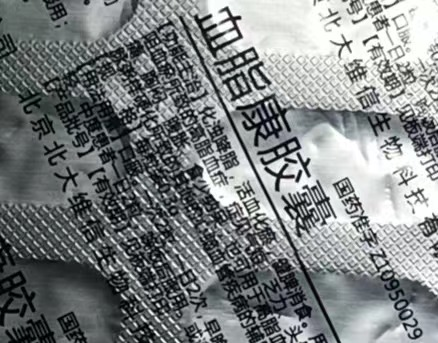

In [13]:
display(Image.fromarray(img2))

In [14]:
image_data = cv2.imencode(ext, img2)[1].tobytes()

In [15]:

response = requests.post(text_recognition_url, headers=headers, data=image_data)
response.raise_for_status()

In [16]:
operation_url = response.headers["Operation-Location"]

In [17]:
analysis = {}
poll = True
while (poll):
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    
    print(json.dumps(analysis, indent=4))

    time.sleep(1)
    if ("analyzeResult" in analysis):
        poll = False
    if ("status" in analysis and analysis['status'] == 'failed'):
        poll = False

{
    "status": "running",
    "createdDateTime": "2021-08-21T05:44:51Z",
    "lastUpdatedDateTime": "2021-08-21T05:44:51Z"
}
{
    "status": "succeeded",
    "createdDateTime": "2021-08-21T05:44:51Z",
    "lastUpdatedDateTime": "2021-08-21T05:44:53Z",
    "analyzeResult": {
        "version": "3.2.0",
        "modelVersion": "2021-04-12",
        "readResults": [
            {
                "page": 1,
                "angle": 64.6062,
                "width": 438,
                "height": 343,
                "unit": "pixel",
                "lines": [
                    {
                        "boundingBox": [
                            401,
                            6,
                            421,
                            51,
                            406,
                            58,
                            386,
                            11
                        ],
                        "text": "\u53e3\u611f\u3002",
                        "words": [


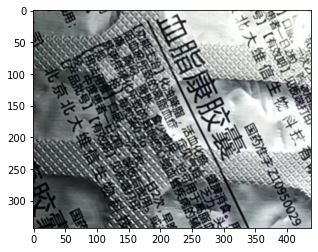

In [18]:
polygons = []
if ("analyzeResult" in analysis):
    polygons = [(line["boundingBox"], line["text"])
                for line in analysis["analyzeResult"]["readResults"][0]["lines"]]

# image = Image.open(BytesIO(image_data))
image = Image.fromarray(img2)
ax = plt.imshow(image)

In [19]:
plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  
plt.rcParams['axes.unicode_minus'] = False  

口感。
患者一日遊元每次
号】【有效期上见板端打印
北大维信生物科技
UuuuK
国药准字Z10950029
血脂康胶囊
能主治】化浊降脂,活血化瘀上健脾消
无致的高脂血症,症久气发
チカ
也可用于
高脂
用
日2次,早
中度患者
品批号】【有效期
北京北大维


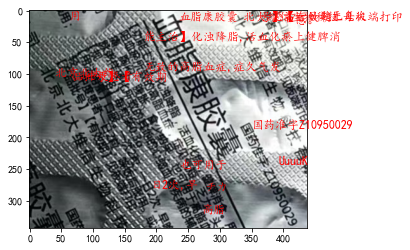

In [20]:
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
                for i in range(0, len(polygon[0]), 2)]
    text = polygon[1]
    print(text)
    patch = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=12, color='red', va='top')
plt.imshow(image)